In [1]:
import matplotlib.pyplot as plt
from operator import add
import numpy as np
import scipy.io.wavfile as wavfile
from IPython.display import Audio

# I. Afficher les données

In [2]:
def affiche(L, P, O, origine=True):
    abscisses_L = [point[0] for point in L]
    ordonnees_L = [point[1] for point in L]

    if P != None :
        abscisses_P = [point[0] for point in P]
        ordonnees_P = [point[1] for point in P]
    
    if O != None : 
        abscisses_O = [point[0] for point in O]
        ordonnees_O = [point[1] for point in O]
    
    
    if origine == True :
        plt.scatter([0],[0], color ='black', label = 'Origine',s=70)
    
    plt.scatter(abscisses_L, ordonnees_L, marker='o', color='b', label='Morceau',s=40)
    
    if P != None :
        plt.scatter(abscisses_P, ordonnees_P, marker='o', color='green', label='Élément structurant',s=40)
    
    if O != None :
        plt.scatter(abscisses_O, ordonnees_O, marker='o', color='r', label='Résultat',s=20)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.xlabel('Temps')
    plt.ylabel('Midi pitch')

    plt.title('Morceau')
    plt.show() 
    
    
#Projection d'un morceau en 2D.    
def Points(Morceau):
    L=[(x[0], x[1]) for x in Morceau]
    return(L)

In [3]:
#Convertit le numéro d'une note MIDI en fréquence en Hertz.
def midi_to_frequency(note):

    return 440 * (2 ** ((note - 69) / 12))

#Génère un son pour une note MIDI donnée.
def generate_sound(note, duration=1, sample_rate=44100):

    t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    frequency = midi_to_frequency(note)
    waveform = np.sin(2 * np.pi * frequency * t)
    return waveform

#Joue les sons des notes MIDI dans l'ordre donné par la liste.
def play_midi_notes(note_list, duration=1):

    sample_rate = 44100
    all_waveforms = []
    for note in note_list:
        waveform = generate_sound(note, duration, sample_rate)
        all_waveforms.extend(waveform)
    all_waveforms = np.array(all_waveforms)
    all_waveforms = np.int16(all_waveforms * 32767)  # Convertir en format int16
    wavfile.write('temp.wav', sample_rate, all_waveforms)
    return Audio('temp.wav', autoplay=True)

# II Opérations morphologiques

In [4]:
#Définition des principales opérations morphologiques : 


def dilatation(P,X):
    L=[]
    for p in P:
        for x in X :
            L.append(tuple(map(add, p, x)))
    
    L = list(set(L))  #s'assurer de tuer les éléments redondants
    L = sorted(L)  #On la retrie car set la dé-trie 
    return(L)

    
def erosion(P,X):
    if len(P) == 0 :
        return('R^2')
    
    t = (P[0][0],P[0][1])
    moins_t=(-P[0][0],-P[0][1])
    P_translate = dilatation([moins_t],P)
    L=[]
    
    for x in X :
        found = True
        
        for p in P_translate :
            if p != (0,0):
                if tuple(map(add, p, x)) not in X :
                    found = False
                    break
                
        if found == True :
            L.append(x)
            
    L = sorted(list(set(L)))
    return(dilatation([moins_t],L))



def opening(P,X):
    L=dilatation(P, erosion(P,X))
    L=sorted(list(set(L)))
    return (L)

def mtec(L,X):                             
    if erosion(erosion(L,X),X) == L :
        return True
    return False

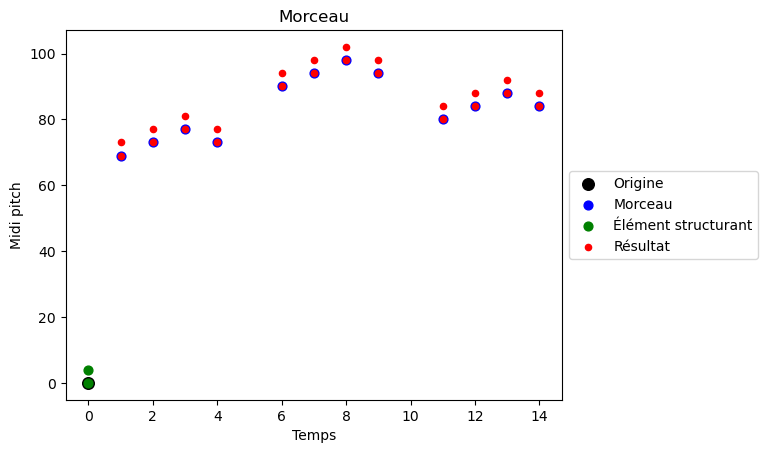

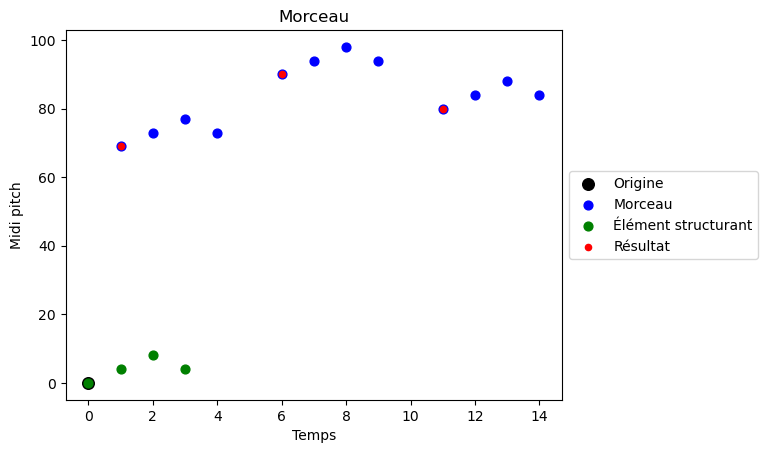

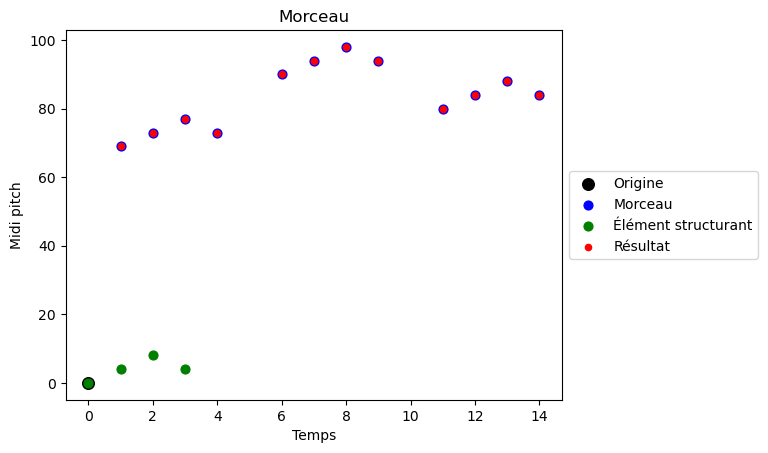

True
False


In [5]:
#Test sur un exemple simple :

X = [(1, 69), (2, 73), (3, 77), (4, 73), (6,90), (7,94), (8,98), (9,94), (11,80), (12,84), (13,88), (14,84)]
P = [(0,0),(1,4),(2,8),(3,4)]
Q=[(0,0),(0,4)]


affiche(X,Q,dilatation(Q,X))
affiche(X,P,erosion(P,X))
affiche(X,P,opening(P,X))

print(mtec(P,X))
print(mtec(Q,X))

# III Opérations variationnelles

## III.1 Érosion et ouverture variationnelles

In [6]:
#Retourne une liste contenant tous les éléments des deux listes données, sans doublons.
def union(list1, list2):
    return list(set(list1) | set(list2))

In [7]:
#Définition des opérateurs variationnels :

def erosion_var(Classe,X):
    L=[]
    for Q in Classe:
        L=union(L,erosion(Q,X))
    return(L)
    

def opening_var(Classe,X):
    L=[]
    for Q in Classe:
        L = union(L,opening(Q,X))

    return(L)

### III.1.a Exemple d'une classe de variations particulière pour la Lettre à Élise :

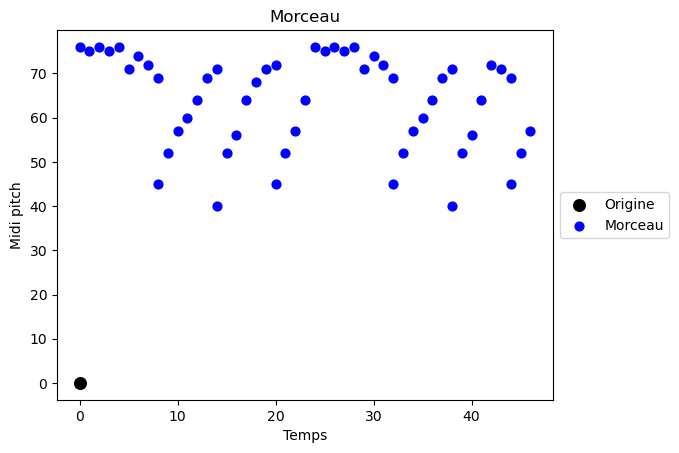

In [8]:
#Représentation du morceau en 3D (Midi pitch)x(instant d'apparition)x(durée).

Lettre_a_Elise=[(0,76,1),(1,75,1),(2,76,1),(3,75,1),
             (4,76,1),(5,71,1),(6,74,1),(7,72,1),
             (8,69,2),
                
             (8,45,1),(9,52,1),(10,57,1),    
             (11,60,1),(12,64,1),(13,69,1),(14,71,2),
                
             (14,40,1),(15,52,1),(16,56,1),   
             (17,64,1),(18,68,1),(19,71,1),(20,72,2), 
                
            
             (20,45,1),(21,52,1),(22,57,1), 
                
             (23,64,1),(24,76,1),(25,75,1),(26,76,1),(27,75,1),
             (28,76,1),(29,71,1),(30,74,1),(31,72,1),
             (32,69,2),

             (32,45,1),(33,52,1),(34,57,1),
             (35,60,1),(36,64,1),(37,69,1), (38,71,2),
                
             (38,40,1),(39,52,1),(40,56,1),   
             (41,64,1),(42,72,1),(43,71,1), (44,69,4),
             
             (44,45,1),(45,52,1),(46,57,1)]
       

    
#A,B,C = zip(*Lettre_a_Elise)
#play_midi_notes(B,0.5)

X = Points(Lettre_a_Elise)  #On projette le morceau dans R^2 en ne gardant que
affiche(X,None,None)        #les 2 premières coordonnées.

[(14, 40), (20, 45), (38, 40), (32, 45), (44, 45), (8, 45)]
[(21, 52), (14, 40), (33, 52), (45, 52), (44, 45), (10, 57), (15, 52), (8, 45), (20, 45), (39, 52), (40, 56), (32, 45), (34, 57), (46, 57), (38, 40), (9, 52), (16, 56), (22, 57)]


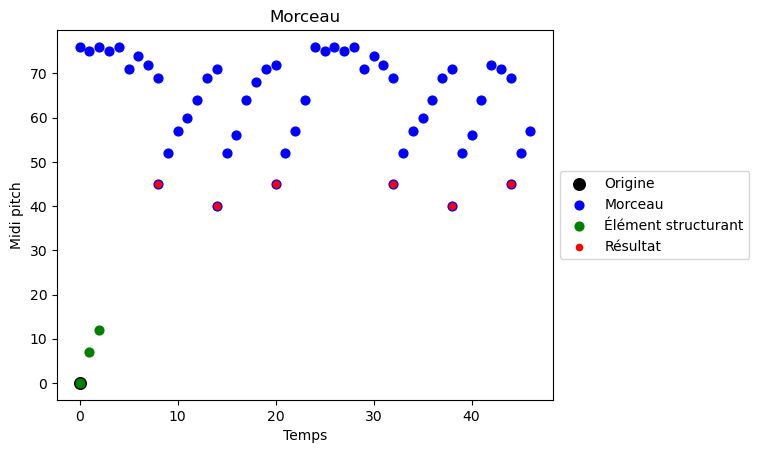

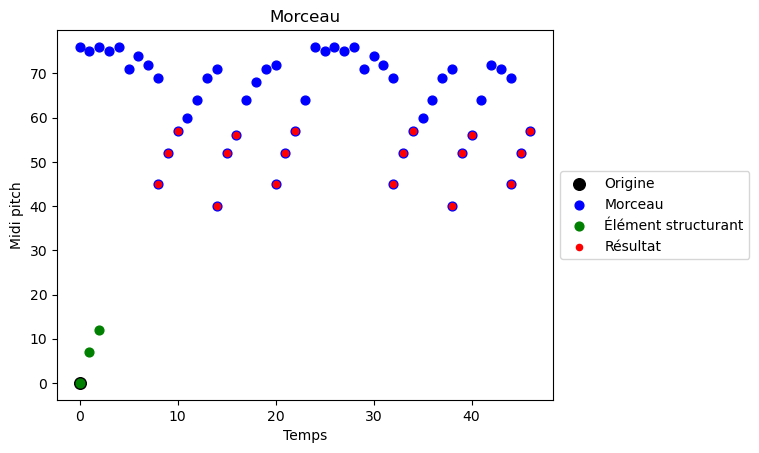

In [9]:
X = Points(Lettre_a_Elise)
P = [(0, 0), (1, 7), (2, 12)]
Q = [(0, 0), (1, 12), (2, 16)]

#Une classe particulière :
Classe_de_variations=[P,Q]

#Érosion et ouverture variationnelles par cette classe.
print(erosion_var(Classe_de_variations,X))
print(opening_var(Classe_de_variations,X))

#On affiche l'érosion variationnelle pour cette classe de variations.
affiche(X,P,erosion_var(Classe_de_variations,X))

#On affiche l'ouverture variationnelle pour cette classe de variations.
affiche(X,P,opening_var(Classe_de_variations,X))

## III.2 Classe à un demi-ton

In [10]:
def inclusion(A,B):
    for a in A:
        if a not in B:
            return False
    return True


def difference(list1, list2):
    
    #Retourne une liste contenant les éléments de la première liste 
    #qui ne sont pas présents dans la deuxième liste.
    
    return list(set(list1) - set(list2))

def tri_couples(couple):
    # La première coordonnée est triée par ordre croissant
    # Si les premières coordonnées sont identiques, la deuxième coordonnée est triée 
    #par ordre croissant
    return (couple[0], couple[1])

# Liste de couples
liste_couples = [(1, 3), (2, 2), (1, 2), (3, 1), (2, 3)]

# Tri de la liste en utilisant la fonction de tri personnalisée
liste_triée = sorted(liste_couples, key=tri_couples)
print(liste_triée)

[(1, 2), (1, 3), (2, 2), (2, 3), (3, 1)]


In [11]:
#Définition de la classe à un demi-ton :

def f_plus(A,P):
    if A == []:
        return(P)
    if inclusion(A,P) == False :
        return(P)
    else :
        L =[]
        for a in A:
        
            P_priv = difference(P,[a])
            P_plus = union(P_priv, [tuple(map(add, a, (0,1) ))])
            L = union(L,(sorted(P_plus, key=tri_couples)))
 
        
        return(L)
    
def f_moins(A,P):
    if A == []:
        return(P)
    if inclusion(A,P) == False :
        return(P)
    else :
        L =[]
        for a in A:
        
            P_priv = difference(P,[a])
            P_moins = union(P_priv, [tuple(map(add, a, (0,-1) ))])
            L = union(L,(sorted(P_moins, key=tri_couples)))

        
        return(L) 
    
    
def Classe_a_un_demi_ton(P):
    Classe=[P]
    for a in P :
        Classe.append(f_plus([a],P))
        Classe.append(f_moins([a],P))
    return(Classe)

### III.2.a Utilisation de la classe à un demi-ton sur la Symphonie No. 5 :

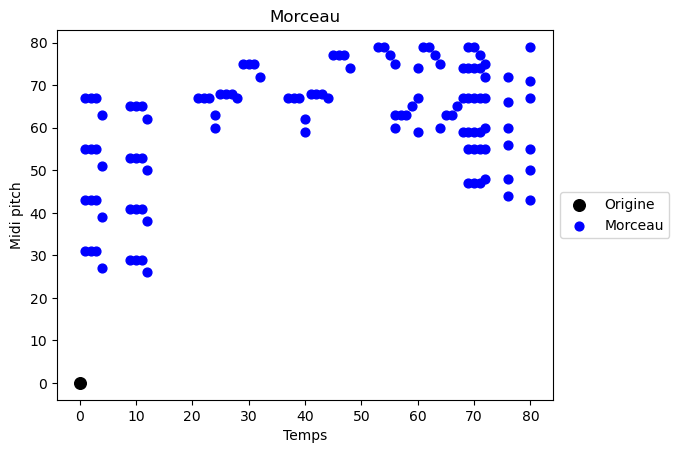

In [12]:
Symph_no_5=[ (1,67,1),(2,67,1),(3,67,1),(4,63,4),
             (1,55,1),(2,55,1),(3,55,1),(4,51,4),
             (1,43,1),(2,43,1),(3,43,1),(4,39,4),
             (1,31,1),(2,31,1),(3,31,1),(4,27,4),
            
             (9,65,1),(10,65,1),(11,65,1),(12,62,8),
             (9,53,1),(10,53,1),(11,53,1),(12,50,8),
             (9,41,1),(10,41,1),(11,41,1),(12,38,8),
             (9,29,1),(10,29,1),(11,29,1),(12,26,8),
            
             (21,67,1),(22,67,1),(23,67,1),(24,63,13),(24,60,16),
                
             (25,68,1),(26,68,1),(27,68,1),(28,67,9),

             (29,75,1),(30,75,1),(31,75,1),(32,72,5),
            
             (37,67,1),(38,67,1),(39,67,1),(40,62,16),(40,59,16),
            
             (41,68,1),(42,68,1),(43,68,1),(44,67,13),
            
             (45,77,1),(46,77,1),(47,77,1),(48,74,5),
            
             (53,79,1),(54,79,1),(55,77,1),(56,75,4),(56,63,1),(56,60,4),
            
             (57,63,1),(58,63,1),(59,65,1),(60,74,1),(60,67,5),(60,59,4),
            
             (61,79,1),(62,79,1),(63,77,1),(64,75,4),(64,60,4),
            
             (65,63,1),(66,63,1),(67,65,1),(68,74,1),(68,67,1),(68,59,1),
            
            
             (69,79,1),(70,79,1),(71,77,1),(72,75,2),
             (69,74,1),(70,74,1),(71,74,1),(72,72,2),
             (69,67,1),(70,67,1),(71,67,1),(72,67,2),
            
             (69,59,1),(70,59,1),(71,59,1),(72,60,2),
             (69,55,1),(70,55,1),(71,55,1),(72,55,2),
             (69,47,1),(70,47,1),(71,47,1),(72,48,2),
            
            
             (76,72,2),
             (76,66,2),
             (76,60,2),
            
             (76,56,2),
             (76,48,2),
             (76,44,2),
            
            
            
             (80,79,2),
             (80,71,2),
             (80,67,2),
             
             (80,55,2),
             (80,50,2),
             (80,43,2)]
             
            

    
Y = Points(Symph_no_5) #Projection en 2D
affiche(Y,None,None)

[(1, 31), (1, 43), (1, 55), (1, 67), (21, 67), (68, 59), (69, 59)]
[(1, 31), (1, 43), (1, 55), (1, 67), (2, 31), (2, 43), (2, 55), (2, 67), (3, 31), (3, 43), (3, 55), (3, 67), (4, 27), (4, 39), (4, 51), (4, 63), (21, 67), (22, 67), (23, 67), (24, 63), (68, 59), (69, 59), (70, 59), (71, 55), (71, 59), (72, 55)]

[(1, 67), (68, 59), (9, 29), (1, 31), (69, 59), (45, 77), (37, 67), (21, 67), (1, 43), (9, 41), (9, 53), (1, 55), (9, 65), (29, 75)]
[(12, 62), (31, 75), (1, 31), (69, 59), (45, 77), (37, 67), (1, 43), (47, 77), (1, 55), (24, 63), (4, 27), (3, 31), (71, 59), (1, 67), (4, 39), (9, 29), (3, 43), (40, 62), (11, 29), (4, 51), (21, 67), (3, 55), (9, 41), (23, 67), (11, 41), (4, 63), (9, 53), (3, 67), (11, 53), (9, 65), (30, 75), (68, 59), (11, 65), (32, 72), (71, 55), (46, 77), (38, 67), (10, 29), (48, 74), (2, 31), (70, 59), (22, 67), (10, 41), (2, 43), (10, 53), (12, 26), (2, 55), (10, 65), (72, 55), (12, 38), (2, 67), (39, 67), (12, 50), (29, 75)]


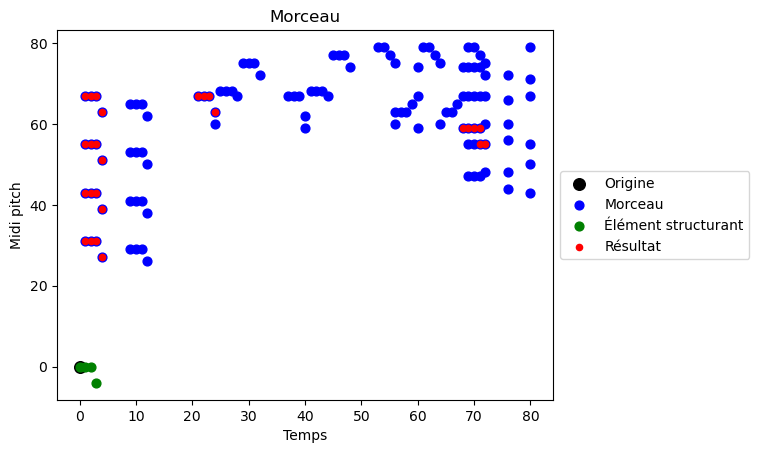

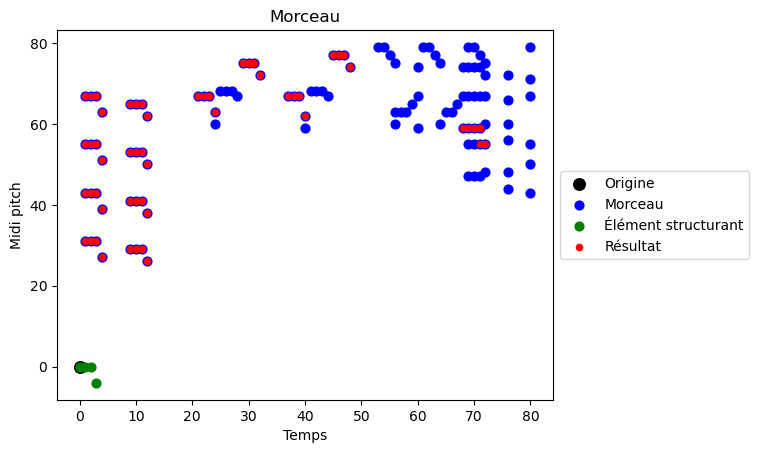

In [13]:
Y = Points(Symph_no_5)
P = [(0,0),(1,0),(2,0),(3,-4)]

#On prend la classe à un demi-ton de P :
Classe_P = Classe_a_un_demi_ton(P)


#Érosion et ouverture binaires par P (= état de l'art) :

print(erosion(P,Y))
print(opening(P,Y))
print()

#Érosion et ouverture variationnelles par la classe à un demi-ton :

print(erosion_var(Classe_P,Y))
print(opening_var(Classe_P,Y))

#On affiche l'ouverture par P (= état de l'art) :
affiche(Y,P,opening(P,Y))

#On affiche l'ouverture variationnelle pour la classe à un demi-ton :
affiche(Y,P,opening_var(Classe_P,Y))

### III.2.b Utilisation de la classe à un demi-ton sur le Prélude 998 :

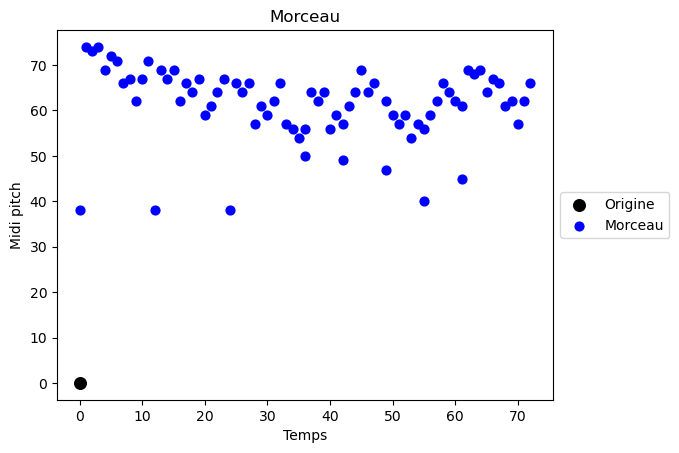

In [14]:
Prelude_998=[(0,38,2),(1,74,1),(2,73,1),(3,74,1),
             (4,69,1),(5,72,1),(6,71,1),(7,66,1),
             (8,67,1),(9,62,1),(10,67,1),(11,71,1),
             
             (12,38,2),(13,69,1),(14,67,1),(15,69,1),
             (16,62,1),(17,66,1), (18,64,1), (19,67,1), 
             (20,59,1), (21,61,1), (22,64,1), (23,67,1), 
             
             (24,38,2),(25,66,1), (26,64,1), (27,66,1), 
             (28,57,1), (29,61,1), (30,59,1), (31,62,1), 
             (32,66,1), (33,57,1), (34,56,1), (35,54,1), 
             
             (36,50,2), (36,56,1), (37,64,1), (38,62,1), (39,64,1), 
             (40,56,1), (41,59,1), (42,49,2), (42,57,1), (43,61,1), 
             (44,64,1), (45,69,1), (46,64,1), (47,66,1),        
             
             (49,47,2), (49,62,1), (50,59,1), (51,57,1), (52,59,1), 
             (53,54,1), (54,57,1), (55,40,2), (55,56,1), (56,59,1), 
             (57,62,1), (58,66,1), (59,64,1), (60,62,2),           
             
             (61,45,2), (61,61,1), (62,69,1), (63,68,1), (64,69,1), 
             (65,64,1), (66,67,1), (67,66,1), (68,61,1), 
             (69,62,1), (70,57,1), (71,62,1), (72,66,1)]
       
    

Z = Points(Prelude_998)  #Projection en 2D.
affiche(Z,None,None)

### Pour un motif P :

[(62, 69), (37, 64), (29, 61), (25, 66), (17, 66), (1, 74), (34, 56), (50, 59), (13, 69)]
[(36, 56), (64, 69), (37, 64), (29, 61), (18, 64), (39, 64), (3, 74), (35, 54), (19, 67), (50, 59), (38, 62), (13, 69), (30, 59), (52, 59), (15, 69), (27, 66), (51, 57), (31, 62), (25, 66), (2, 73), (26, 64), (14, 67), (17, 66), (1, 74), (63, 68), (34, 56), (62, 69)]


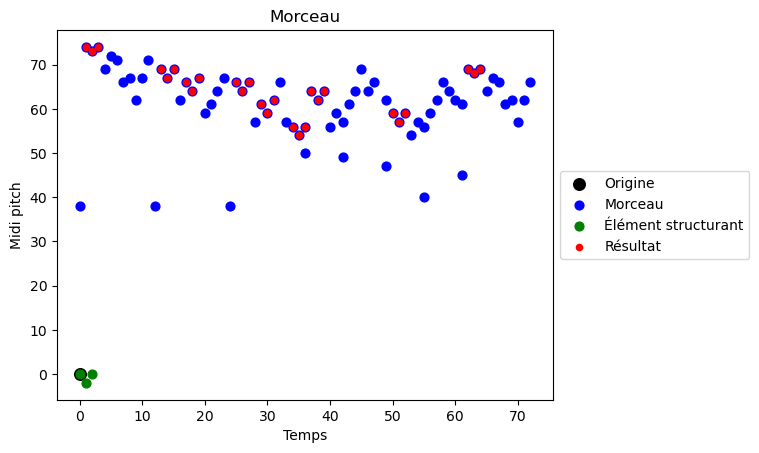

In [15]:
Z = Points(Prelude_998)
P = [(0,0),(1,-2),(2,0)]

#On prend la classe à un demi-ton de P :
Classe_P = Classe_a_un_demi_ton(P)

#Érosion et ouverture variationnelles par la classe à un demi-ton :

print(erosion_var(Classe_P,Z))
print(opening_var(Classe_P,Z))

#On affiche l'ouverture variationnelle pour la classe à un demi-ton :
affiche(Z,P,opening_var(Classe_P,Z))

### Pour un autre motif Q :

[(28, 57), (4, 69), (57, 62), (53, 54), (65, 64), (40, 56), (16, 62)]
[(57, 62), (59, 64), (29, 61), (42, 57), (18, 64), (54, 57), (6, 71), (65, 64), (17, 66), (67, 66), (40, 56), (16, 62), (58, 66), (30, 59), (41, 59), (55, 56), (5, 72), (66, 67), (28, 57), (4, 69), (53, 54)]


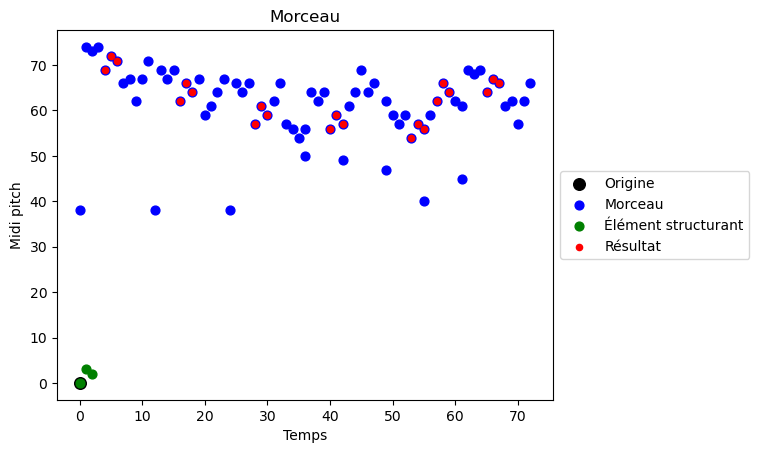

In [16]:
Z = Points(Prelude_998)
Q = [(0,0),(1,3),(2,2)]

#On prend la classe à un demi-ton de Q :
Classe_Q = Classe_a_un_demi_ton(Q)

#Érosion et ouverture variationnelles par la classe à un demi-ton :

print(erosion_var(Classe_Q,Z))
print(opening_var(Classe_Q,Z))

#On affiche l'ouverture variationnelle pour la classe à un demi-ton :
affiche(Z,Q,opening_var(Classe_Q,Z))